# Table of Contents

# Setting up the Notebook

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
from folium.plugins import MarkerCluster

In [10]:
# Have matplotlib visuals appear in notebook
%matplotlib inline

In [2]:
path = r'C:\Users\mmreg\OneDrive\Desktop\Data Analytics Course Work\Data Immersion\Tasks\08-2022 Exploratory Analytics Project\02 Data'

In [4]:
# Import dataset for analysis
df = pd.read_csv(os.path.join(path, 'Prepared', 'citibike_clean.csv'), index_col = False)

In [5]:
df.head()

Unnamed: 0 trip_id  bike_id weekday  start_hour       start_time  \
0           0  LnQzQk    16013     Mon          18   9/9/2013 18:18   
1           1  IL9boN    15230     Thu          18  9/12/2013 18:38   
2           2  46clGB    17942     Wed          19  9/18/2013 19:44   
3           3  v7vdFt    19683     Sat          11  9/28/2013 11:54   
4           4  VGBsb5    18024     Sat          18   9/7/2013 18:08   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude         end_time  end_station_id  \
0               -73.991382   9/9/2013 18:35             334   
1               -74.002472  9/12/2013 18:48             236   
2               -73.991255  9/18/2013 19:50             513   
3               -73.974347  9/28/2013 12:03             441   
4               -73.994811   9/7/2013 18:46             476   

      end_station_name  end_station_latitude  end_station_longitude  \
0      W 20 St & 7 Ave             40.742388             -73.997262   
1  St Marks Pl & 2 Ave             40.728419             -73.987140   
2     W 56 St & 10 Ave             40.768254             -73.988639   
3      E 52 St & 2 Ave             40.756014             -73.967416   
4      E 31 St & 3 Ave             40.743943             -73.979661   

   trip_duration      subscriber  birth_year  gender customer_volume  
0            993      Subscriber      1968.0       2     High Volume  
1            581      Subscriber      1983.0       1     High Volume  
2            361      Subscriber      1989.0       1     High Volume  
3            561      Subscriber      1988.0       2   Normal Volume  
4           2296  Non-Subscriber         NaN       0     High Volume

In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head()

trip_id  bike_id weekday  start_hour       start_time  start_station_id  \
0  LnQzQk    16013     Mon          18   9/9/2013 18:18               523   
1  IL9boN    15230     Thu          18  9/12/2013 18:38               257   
2  46clGB    17942     Wed          19  9/18/2013 19:44               479   
3  v7vdFt    19683     Sat          11  9/28/2013 11:54               527   
4  VGBsb5    18024     Sat          18   9/7/2013 18:08               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

          end_time  end_station_id     end_station_name  end_station_latitude  \
0   9/9/2013 18:35             334      W 20 St & 7 Ave             40.742388   
1  9/12/2013 18:48             236  St Marks Pl & 2 Ave             40.728419   
2  9/18/2013 19:50             513     W 56 St & 10 Ave             40.768254   
3  9/28/2013 12:03             441      E 52 St & 2 Ave             40.756014   
4   9/7/2013 18:46             476      E 31 St & 3 Ave             40.743943   

   end_station_longitude  trip_duration      subscriber  birth_year  gender  \
0             -73.997262            993      Subscriber      1968.0       2   
1             -73.987140            581      Subscriber      1983.0       1   
2             -73.988639            361      Subscriber      1989.0       1   
3             -73.967416            561      Subscriber      1988.0       2   
4             -73.979661           2296  Non-Subscriber         NaN       0   

  customer_volume  
0     High Volume  
1     High Volume  
2     High Volume  
3   Normal Volume  
4     High Volume

In [11]:
# Import JSON file for mapping
nyc_geo = r'C:\Users\mmreg\OneDrive\Desktop\Data Analytics Course Work\Data Immersion\Tasks\08-2022 Exploratory Analytics Project\02 Data\Original\6.3 NYC Geoinfo.geojson'

In [12]:
nyc_geo

'C:\\Users\\mmreg\\OneDrive\\Desktop\\Data Analytics Course Work\\Data Immersion\\Tasks\\08-2022 Exploratory Analytics Project\\02 Data\\Original\\6.3 NYC Geoinfo.geojson'

# Question 5
## Wrangle your project data to meet the needs of your analysis

In [60]:
# Select necessary columns to put into list
columns = ['weekday', 'start_hour', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'start_station_name', 'end_station_name']

In [61]:
# Create required subset
df_map = df[columns]

In [62]:
df_map.head()

weekday  start_hour  start_station_latitude  start_station_longitude  \
0     Mon          18               40.754666               -73.991382   
1     Thu          18               40.719392               -74.002472   
2     Wed          19               40.760193               -73.991255   
3     Sat          11               40.743156               -73.974347   
4     Sat          18               40.750450               -73.994811   

   end_station_latitude  end_station_longitude  trip_duration  \
0             40.742388             -73.997262            993   
1             40.728419             -73.987140            581   
2             40.768254             -73.988639            361   
3             40.756014             -73.967416            561   
4             40.743943             -73.979661           2296   

        start_station_name     end_station_name  
0          W 38 St & 8 Ave      W 20 St & 7 Ave  
1  Lispenard St & Broadway  St Marks Pl & 2 Ave  
2          9 Ave & W 45 St     W 56 St & 10 Ave  
3          E 33 St & 1 Ave      E 52 St & 2 Ave  
4          8 Ave & W 31 St      E 31 St & 3 Ave

# Question 6
## Clean your data set — watch for missing and extreme values.

In [17]:
# Look for missing values
df_map.isnull().sum()

weekday                    0
start_hour                 0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
dtype: int64

<AxesSubplot:xlabel='weekday', ylabel='Count'>

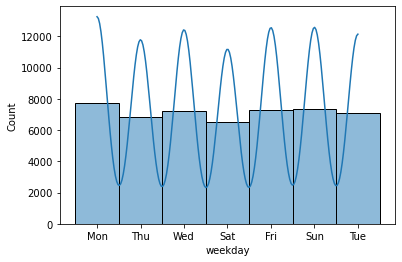

In [18]:
# No missing values present
# Check for extreme variables
sns.histplot(df_map['weekday'], bins=20, kde = True)

<AxesSubplot:xlabel='start_hour', ylabel='Count'>

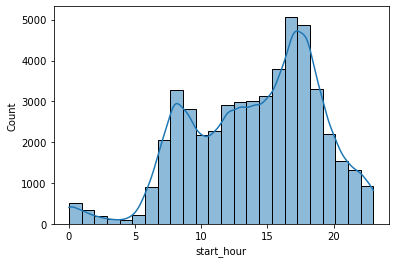

In [20]:
sns.histplot(df_map['start_hour'], bins = 24, kde = True)

<AxesSubplot:xlabel='start_station_longitude', ylabel='Count'>

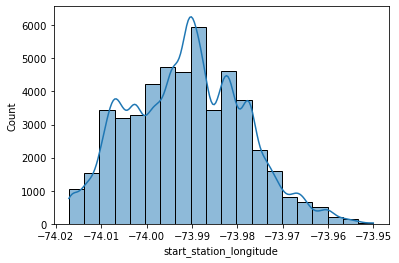

In [21]:
sns.histplot(df_map['start_station_longitude'], bins = 20, kde = True)

<AxesSubplot:xlabel='start_station_latitude', ylabel='Count'>

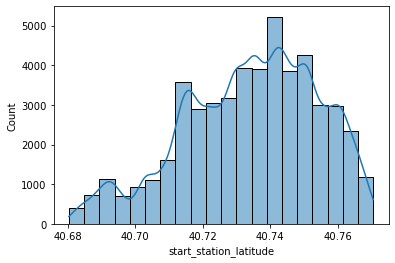

In [22]:
sns.histplot(df_map['start_station_latitude'], bins = 20, kde = True)

<AxesSubplot:xlabel='end_station_longitude', ylabel='Count'>

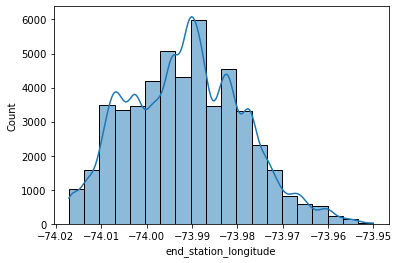

In [23]:
sns.histplot(df_map['end_station_longitude'], bins = 20, kde = True)

<AxesSubplot:xlabel='end_station_latitude', ylabel='Count'>

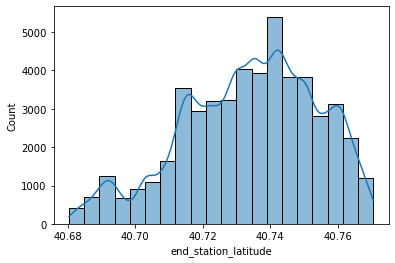

In [24]:
sns.histplot(df_map['end_station_latitude'], bins = 20, kde = True)

### All variables seem to be within normal parameters

# Question 7
## Create a choropleth map using a variable of your choice.

In [36]:
# Create dataframe with just start locations and start hour
plot_data = df_map[['start_hour', 'start_station_latitude', 'start_station_longitude', 'start_station_name']]
plot_data.head()

start_hour  start_station_latitude  start_station_longitude  \
0          18               40.754666               -73.991382   
1          18               40.719392               -74.002472   
2          19               40.760193               -73.991255   
3          11               40.743156               -73.974347   
4          18               40.750450               -73.994811   

        start_station_name  
0          W 38 St & 8 Ave  
1  Lispenard St & Broadway  
2          9 Ave & W 45 St  
3          E 33 St & 1 Ave  
4          8 Ave & W 31 St

In [59]:
# Create map of starting locations
m = folium.Map(location = [40.712772, -74.006058], tiles = 'OpenStreetMap', zoom_start=13)

markerCluster = MarkerCluster().add_to(m)

for i, row in plot_data.iterrows():
    lat = plot_data.at[i, 'start_station_latitude']
    lng = plot_data.at[i, 'start_station_longitude']
    
    popup = 'Station: ' + str(plot_data.at[i, 'start_station_name'])
    
    folium.Marker(location = [lat, lng], popup = popup, icon = \
                                 folium.Icon(color = 'blue')).add_to(markerCluster)

m.save('citibike_start_locations.html')

In [64]:
# Create dataframe with just end locations
plot_data_2 = df_map[['end_station_latitude', 'end_station_longitude', 'end_station_name']]
plot_data_2.head()

end_station_latitude  end_station_longitude     end_station_name
0             40.742388             -73.997262      W 20 St & 7 Ave
1             40.728419             -73.987140  St Marks Pl & 2 Ave
2             40.768254             -73.988639     W 56 St & 10 Ave
3             40.756014             -73.967416      E 52 St & 2 Ave
4             40.743943             -73.979661      E 31 St & 3 Ave

In [65]:
# Create map of end location
m = folium.Map(location = [40.712772, -74.006058], tiles = 'OpenStreetMap', zoom_start=13)

markerCluster = MarkerCluster().add_to(m)

for i, row in plot_data_2.iterrows():
    lat = plot_data_2.at[i, 'end_station_latitude']
    lng = plot_data_2.at[i, 'end_station_longitude']
    
    popup = 'Station: ' + str(plot_data_2.at[i, 'end_station_name'])
    
    folium.Marker(location = [lat, lng], popup = popup, icon = \
                                 folium.Icon(color = 'blue')).add_to(markerCluster)

m.save('citibike_end_locations.html')

# Question 8
## Discuss the results and what they mean in a markdown section.

### Using the two maps, we can see where most bikes are starting from and where they are ending. The range of locations for the company are Manhatten, with a little overlap in the Brooklyn borough. If we were to look in more detail, we can see that the majority of bikes are rented inland, and are taken to the shoreline. We can also see which stations are seeing the most action in terms of rental based on the color of the cluster. The next question I would have for this data is to find out empirically whether or not my assumption is correct about bikes being rented from the interior of the island and taken to the shore.